**Problem Definition**

A Given Farming Cooperative Has a Past amount of Agriculture Production Data and they Want to deliver some insights from these data about how they are working, what they need to change, which crops are providing a massive production, which crops are down in harvest,
How climate changes is affecting the production,on which crops Irrigation can Be used more and why?, How can they increase Yields per hectare for each crops, what can they do to increase production in general.

**How Good Final Solution Would look Like?**
1. Delivering Insights about Crops Production Improvement
2. Possible Solution To Be Taken To Mitigate Negative Impact Of Climate Changes  On Crop Production.
3. Addressing Effect Of Using Fertilizers and Irrigation.

**Data Collection**

Dataset which is used here downloaded from kaggle.com, the original data set contains 1000,000 of rows, so i got 30% of the data as sample to use in this project.
Dataset was cleaned which means there is no lot about data cleaning, but we still have to preprocess data before fitting it to Linear Regression Model.

In [55]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import missingno as mso
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd



Reading Data From The Source

In [2]:
df = pd.read_csv(r'D:\All_Projects\Econometrics_Practice\data\raw_data\crop_yield.csv')

In [4]:
# Observing First 5 Rows
df.head()

,Unnamed: 0,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,220204,North,Chalky,Maize,676.978212,16.811722,False,False,Rainy,117,4.505291
1,669381,South,Loam,Cotton,965.178833,37.331926,False,True,Rainy,134,7.155132
2,801941,North,Peaty,Barley,619.418797,18.318038,False,True,Cloudy,97,5.298954
3,673885,South,Loam,Maize,160.106184,38.142053,False,False,Sunny,141,1.652356
4,389823,East,Clay,Cotton,940.097532,21.723535,False,False,Rainy,117,5.824154


In [3]:
# Remove Unamed Column as It is not part of The Data Set
df.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
# Displaying Shape of Data Set
df.shape

In [ ]:
# Display Summary Statistics for Categorical Features
df.describe(include=object)

In [ ]:
# Display Summary Statistics for Numerical Features
df.describe(include=float)

In [ ]:
df.describe()

In [ ]:
# Show All Columns
df.columns

In [ ]:
# Verify if no missing values
mso.matrix(df, color=(0.22, 0.17, 0.10), figsize=(10, 2))


Above Figure Shows That There Is No Missing Values In All Observations\
Data Set Is Cleaned.

In [24]:
df_total_crops_observation = df.groupby('Crop').count()
df_total_crops_observation['Counts'] = df_total_crops_observation['Yield_tons_per_hectare']
df_total_crops_observation = df_total_crops_observation.reset_index()
df_total_crops_observation

,Crop,Region,Soil_Type,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare,Counts
0,Barley,49973,49973,49973,49973,49973,49973,49973,49973,49973,49973
1,Cotton,50019,50019,50019,50019,50019,50019,50019,50019,50019,50019
2,Maize,50248,50248,50248,50248,50248,50248,50248,50248,50248,50248
3,Rice,49912,49912,49912,49912,49912,49912,49912,49912,49912,49912
4,Soybean,49777,49777,49777,49777,49777,49777,49777,49777,49777,49777
5,Wheat,50071,50071,50071,50071,50071,50071,50071,50071,50071,50071


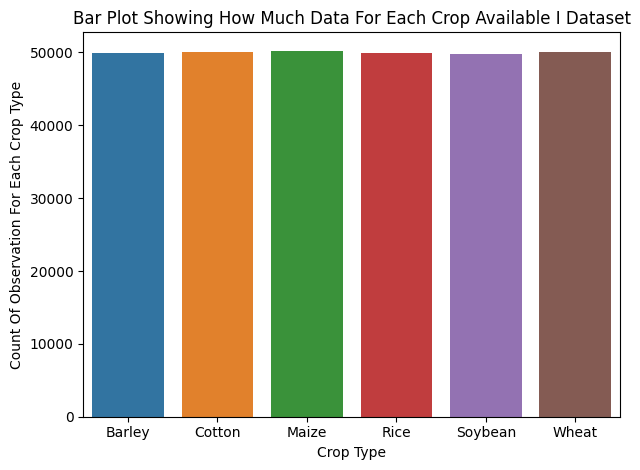

In [25]:
# Visualize How Crop Type Appears In dataset
plt.Figure(figsize=(10, 6))
sns.barplot(x='Crop', y='Counts', data=df_total_crops_observation, hue='Crop', orient='v')
plt.title("Bar Plot Showing How Much Data For Each Crop Available I Dataset")
plt.xlabel("Crop Type")
plt.ylabel("Count Of Observation For Each Crop Type")
plt.tight_layout()
plt.savefig(r'D:\All_Projects\Econometrics_Practice\report\charts\crops_count_barplot.png', dpi=400, bbox_inches='tight')
plt.show()

Above Plot Shows How Much Crop Data We have in dataset.
1. Rice, SoyBean and Wheat have high observation.

**Test Hypothesis**
1. a) Rainfall does not Affect Yield Per Hectare (Null Hypothesis <=> H_0)\
   b) Rainfall does Affect Yield Per Hectare  (Alternative Hypothesis <=> H_1)

In [27]:
# Use Hypothesis Testing
x, y = pearsonr( x=df['Rainfall_mm'], y=df['Yield_tons_per_hectare'], alternative='greater')
print(f"Pearson Correlation Between RainFall and Yiels Tons PerHectare is: {x}\nProbability That RainFall Affect Yiels Tons PerHectare s: { y}")


Pearson Correlation Between RainFall and Yiels Tons PerHectare is: 0.7647630323697433
Probability That RainFall Affect Yiels Tons PerHectare s: 0.0


**Interpretation Above**
There is Strong Positive Correlation Between Rain Fall and Yields per Hectare, which means as rain fall increase also yields increase or when rain fall decrease also yields decrease.

Probability That This Is happening by random chance is less than 0.05 (5%) this means that we reject Null Hypothesis. 

**Conclusion**

1. Rainfall does not Affect Yield Per Hectare (**Rejected**)
2. Rainfall does Affect Yield Per Hectare (**Approved**)

=> Above Statement State that there are not enought evidence to prove that Rainfall does not Affect Yield Per Hectare

This Means that climate change affect Production.

**Visual Represantation**

Do Rain Fall affect Yield Per Hectare (Production)?

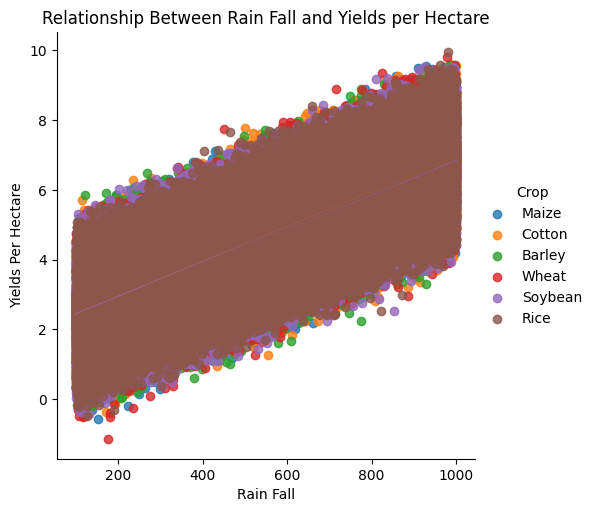

In [29]:
sns.lmplot(data=df, x='Rainfall_mm', y='Yield_tons_per_hectare', hue='Crop')
plt.title("Relationship Between Rain Fall and Yields per Hectare")
plt.xlabel("Rain Fall")
plt.ylabel("Yields Per Hectare")
plt.savefig(r'D:\All_Projects\Econometrics_Practice\report\charts\rainfall_vs_yields.png', dpi=500, bbox_inches='tight')
plt.show()

**Exploration ABove**

Based on exploration above the figure shows that there is strong correlation betwenn rainfall and yields per hectare,
where crops like Rice, wheat and others are increasing in production as rain increase, as well as decrease in production as rainfall decrease

Visualize How Much Each Soil Type Observations We Have In data set

In [ ]:
plt.title("Bar Plot Shows Soil Type For All Crops")
plt.xlabel("Soil Type")
plt.ylabel("COunts Of Observation")
sns.barplot(x='Soil_Type', data=df, hue='Soil_Type', orient='v')
plt.show()

In [4]:
# Show unique values in non numeric features and analyze how to encode those features
for col in df.select_dtypes(include=[object, bool]):
    print(df[col].unique())
    print('\n')

['North' 'South' 'East' 'West']


['Chalky' 'Loam' 'Peaty' 'Clay' 'Silt' 'Sandy']


['Maize' 'Cotton' 'Barley' 'Wheat' 'Soybean' 'Rice']


[False  True]


[False  True]


['Rainy' 'Cloudy' 'Sunny']




Above output shows the unique values for categorical features

**Action To Be Taken**

Use Encoding techniques to change categorical values to numerical zeros and ones

In [32]:
df_fert = df[['Yield_tons_per_hectare', 'Fertilizer_Used']].groupby('Fertilizer_Used').mean().add_prefix("Mean_").reset_index()
df_fert

,Fertilizer_Used,Mean_Yield_tons_per_hectare
0,False,3.901578
1,True,5.397205


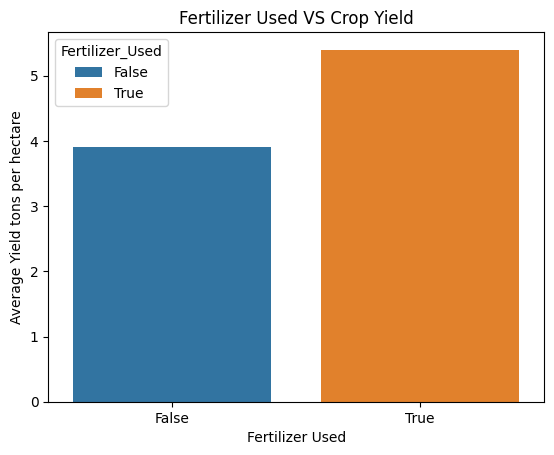

In [34]:
plt.title("Fertilizer Used VS Crop Yield")
plt.xlabel("Fertilizer Used")
plt.ylabel("Average Yield tons per hectare")
sns.barplot(x='Fertilizer_Used', y='Mean_Yield_tons_per_hectare', data=df_fert, hue='Fertilizer_Used')
plt.savefig(r'D:\All_Projects\Econometrics_Practice\report\charts\fertilizer_yield.png', dpi=500)


Above Summary table Shows that Yield tons per hectare's average when fertilizer is used, is slight more with 1.3 tons difference
compared when fertilizer is not used.\
This means that using fertilizer increase Yield tons per hectare


**Hypothesis Testing**

1. (Null Hypothesis) Whether Using Fertilizer or Not, Does Not Affect Crop Yield Tons Per Hectare
2. (Alternative Hypothesis) Whether Using Fertilizer or Not, Does Affect Crop Yield Tons Per Hectare

In [50]:
fertilizer_true = df[df['Fertilizer_Used'].astype(str) == 'True']['Yield_tons_per_hectare']
fertilizer_false = df[df['Fertilizer_Used'].astype(str) == 'False']['Yield_tons_per_hectare']

# print(fertilizer_false.var(), fertilizer_true.var())
alpha = 0.05
t_stat, p_value_ttest = stats.ttest_ind(fertilizer_true, fertilizer_false, equal_var=True)
print(f"{t_stat:.2f}\n{p_value_ttest:.3f}" )

if p_value_ttest < alpha:
    print(f"Since {p_value_ttest:.3} is Less Than {alpha}, We Reject Null Hypothesis.")
    print("""Conclusion:\n1.There is Statistically Significant Difference Between The Mean Of 
                Crop Yield Per Hectare when Fertilizer is used and 
                Crop Yield Per Hectare when Fertilizer is not used.
            =>Fertilizer Affect Crop Yield
          """)

else:
    print(f"""Since {p_value_ttest:.3} is Greater Than Or Equal To {alpha}
          Conclusion:\n1.There is  no Statistically Significant Difference Between The Mean Of 
                Crop Yield Per Hectare when Fertilizer is used and 
                Crop Yield Per Hectare when Fertilizer is not used.
          """)

269.15
0.000
Since 0.0 is Less Than 0.05, We Reject Null Hypothesis.
Conclusion:
1.There is Statistically Significant Difference Between The Mean Of 
                Crop Yield Per Hectare when Fertilizer is used and 
                Crop Yield Per Hectare when Fertilizer is not used.
            =>Fertilizer Affect Crop Yield
          


In [15]:
df_irr = df[['Yield_tons_per_hectare', 'Irrigation_Used']].groupby('Irrigation_Used').mean()
df_irr

,Yield_tons_per_hectare
Irrigation_Used,
False,4.048615
True,5.249651


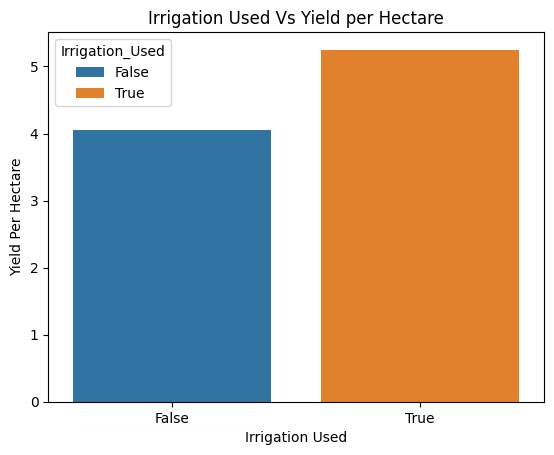

In [12]:
plt.title("Irrigation Used Vs Yield per Hectare")
plt.xlabel("Irrigation Used")
plt.ylabel("Yield Per Hectare")
sns.barplot(x=df_irr.index, y=df_irr['Yield_tons_per_hectare'], hue=df_irr.index, orient='v')
plt.savefig(r'D:\All_Projects\Econometrics_Practice\report\charts\irrigation_yield.png', dpi=300, bbox_inches='tight')

Above Plot shows that  there is increase in Yield tons per hectare when Irrigation Is Used with average difference of 1.2 tons, applying irrigation also is great choice.

**Hypothesis Testing**

1. (Null Hypothesis) Whether Using Irrigation or Not, Does Not Affect Crop Yield Tons Per Hectare
2. (Alternative Hypothesis) Whether Using Irrigation or Not, Does Affect Crop Yield Tons Per Hectare

In [52]:
irrigation_true = df[df['Irrigation_Used'].astype(str) == 'True']['Yield_tons_per_hectare']
irrigation_false = df[df['Irrigation_Used'].astype(str) == 'False']['Yield_tons_per_hectare']

# print(irrigation_false.var(), irrigation_true.var())
alpha = 0.05
t_stat, p_value_ttest = stats.ttest_ind(irrigation_true, irrigation_false, equal_var=True)
print(f"{t_stat:.2f}\n{p_value_ttest:.3f}" )

if p_value_ttest < alpha:
    print(f"Since {p_value_ttest:.3} is Less Than {alpha}, We Reject Null Hypothesis.")
    print("""Conclusion:\n1.There is Statistically Significant Difference Between The Mean Of 
                Crop Yield Per Hectare when Irrigation is used and 
                Crop Yield Per Hectare when Irrigation is not used.
            =>Irrigation Affect Crop Yield
          """)

else:
    print(f"""Since {p_value_ttest:.3} is Greater Than Or Equal To {alpha}
          Conclusion:\n1.There is  no Statistically Significant Difference Between The Mean Of 
                Crop Yield Per Hectare when Irrigation is used and 
                Crop Yield Per Hectare when Irrigation is not used.
          """)

207.43
0.000
Since 0.0 is Less Than 0.05, We Reject Null Hypothesis.
Conclusion:
1.There is Statistically Significant Difference Between The Mean Of 
                Crop Yield Per Hectare when Irrigation is used and 
                Crop Yield Per Hectare when Irrigation is not used.
            =>Irrigation Affect Crop Yield
          


Do All Crops Tend To Produce More Tons of Production when Fertilizer Is Used?

In [8]:
df_yield_crop = df[['Yield_tons_per_hectare', 'Crop', 'Fertilizer_Used']].groupby(['Crop', 'Fertilizer_Used']).sum()
df_yield_crop = df_yield_crop.reset_index()
df_yield_crop

,Crop,Fertilizer_Used,Yield_tons_per_hectare
0,Barley,False,97508.746828
1,Barley,True,134445.404940
2,Cotton,False,96963.565910
3,Cotton,True,135521.252190
4,Maize,False,97887.237746
5,Maize,True,135437.261081
6,Rice,False,97692.684362
7,Rice,True,134559.390386
8,Soybean,False,97973.341415
9,Soybean,True,133647.389099


Summary Table Above Is Confirming That All Crops Have More Yield Tons per Hectare When Fertilizer is used

**Conclusion**

Yes All Crops Tend To Produce More Production when Fertlizer is Used.

Is there any Crop Which is not affected by Rain Fall? how is Yield when Rainfall is dicreased?

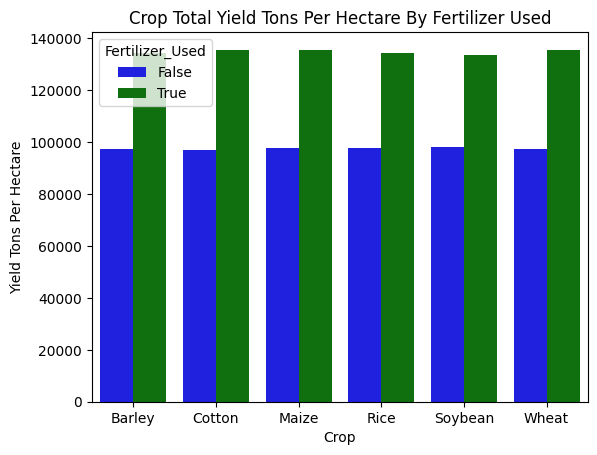

In [11]:
plt.title("Crop Total Yield Tons Per Hectare By Fertilizer Used")
plt.xlabel("Crop")
plt.ylabel("Yield Tons Per Hectare")
sns.barplot(x='Crop', y='Yield_tons_per_hectare', hue='Fertilizer_Used', data=df_yield_crop, palette={True: 'green', False: 'blue'})
plt.savefig(r'D:\All_Projects\Econometrics_Practice\report\charts\crop_yield_fertilizer.png', dpi=300, bbox_inches='tight')

Above Plot Shows Total Yield Tons For Each Crop For Time Fertilizer was Used and Time It was not Used

1.**Green**: Fertilizer Was Used\
2.**Blue**: Fertilizer Was Not Used

In [41]:
df[df['Rainfall_mm'] < 150][df['Yield_tons_per_hectare'] < 1]
# df['Yield_tons_per_hectare'] = abs(df['Yield_tons_per_hectare'])

C:\Users\Gervais\AppData\Local\Temp\ipykernel_8108\1586173048.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Rainfall_mm'] < 150][df['Yield_tons_per_hectare'] < 1]


,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
21,North,Loam,Barley,124.905360,18.364885,False,False,Sunny,68,0.581955
283,North,Silt,Barley,104.184363,26.131116,False,False,Rainy,83,0.845366
417,East,Silt,Maize,101.032473,21.909410,False,False,Cloudy,108,0.537770
466,South,Clay,Soybean,149.022099,35.537714,False,False,Cloudy,127,0.913425
613,North,Peaty,Cotton,134.904269,19.810167,False,False,Sunny,71,0.330198
...,...,...,...,...,...,...,...,...,...,...
298840,North,Peaty,Barley,113.408452,26.885352,False,False,Rainy,119,0.735514
299189,North,Chalky,Soybean,142.024097,25.566238,False,False,Rainy,69,0.960297
299506,East,Peaty,Wheat,119.085638,24.208382,False,False,Rainy,147,0.939540
299520,South,Chalky,Rice,129.448089,19.195846,False,False,Sunny,133,0.372883


No Crop which is not affected by Rainfall

Less Rainfall + Not using both Irrigation and Fertilizer Yields Tons Per Hectare Falls Down

Do Crops Produce Same Yield Tons Per Hectare for all Weather Conditions?

In [16]:
df_yield_crop_weather = df[['Yield_tons_per_hectare' , 'Crop', 'Weather_Condition']].groupby(['Crop', 'Weather_Condition']).mean()
df_yield_crop_weather = df_yield_crop_weather.reset_index()
df_yield_crop_weather

,Crop,Weather_Condition,Yield_tons_per_hectare
0,Barley,Cloudy,4.653002
1,Barley,Rainy,4.612719
2,Barley,Sunny,4.659638
3,Cotton,Cloudy,4.640866
4,Cotton,Rainy,4.659072
5,Cotton,Sunny,4.643901
6,Maize,Cloudy,4.632244
7,Maize,Rainy,4.646965
8,Maize,Sunny,4.651159
9,Rice,Cloudy,4.641928


Above Summary Table Shows How much Tons Of Yield Produced By Crops In Different Weather Condition.

**Interpretation**

1. Barley Crop Produce more Tons in Sunny Condition with Small Difference average tons of 0.006 to Cloudy
2. Cotton Produce More In Rainy Condition
3. Maize Produce More In Sunny Condition
4. Rice Produce More In Rainy Condition
5. SoyBean Produce More In Rainy Condition
6. Wheat Produce More Both In Cloudy and Rainy Condition

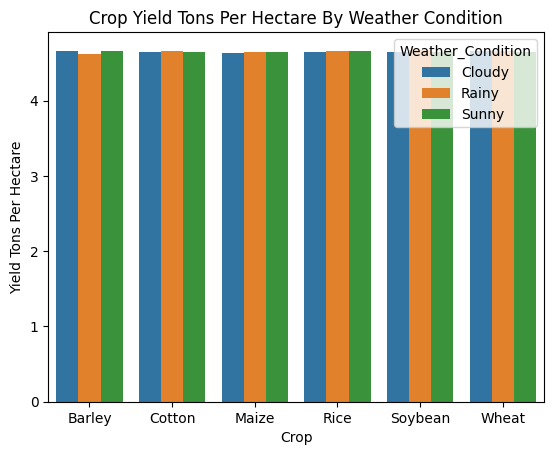

In [18]:
plt.title("Crop Yield Tons Per Hectare By Weather Condition")
plt.xlabel("Crop")
plt.ylabel("Yield Tons Per Hectare")
sns.barplot(x='Crop', y='Yield_tons_per_hectare', hue='Weather_Condition', data=df_yield_crop_weather)
plt.savefig(r'D:\All_Projects\Econometrics_Practice\report\charts\crop_yield_on_weather_condition.png', dpi=300, bbox_inches='tight')

Above Chart Represent How much Average Of Crop Yield Tons On Different Weather Condtion

**Hypothesis Testing**

1. (Null Hypothesis) Weather Condition Does Not Affect Yiel Tons Per Hectare
2. (Alternative Hypothesis) Weather Condition Affects Yiel Tons Per Hectare

**Analysis Of Variance** 

In [58]:
weather_conditions = [df['Yield_tons_per_hectare'][df['Weather_Condition'] == condition] for condition in df['Weather_Condition'].unique()]

f_stat, p_value_anova = stats.f_oneway(*weather_conditions)

print(f"F-Statistic: {f_stat}\nP-Value: {p_value_anova}\n")
alpha = 0.05
if p_value_anova < alpha:
    print(f"Since {p_value_anova} is Less Than {alpha}")
    print("Conclusion:\nThere is Statistically Significant difference between mean of Crop Yield Tons Across All Weather Conditions")

else:    
    print(f"Since {p_value_anova} is Greater Than Or Equal To {alpha}\n")
    print("Conclusion:\nThere is no Statistically Significant difference between mean of Crop Yield Tons Across All Weather Conditions")
    
    
    

F-Statistic: 0.5040488829843764
P-Value: 0.6040803645415846

Since 0.6040803645415846 is Greater Than Or Equal To 0.05

Conclusion:
There is no Statistically Significant difference between mean of Crop Yield Tons Across All Weather Conditions


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
Cloudy  Rainy   0.0076 0.5783 -0.0102 0.0253  False
Cloudy  Sunny   0.0045 0.8213 -0.0132 0.0223  False
 Rainy  Sunny   -0.003 0.9154 -0.0208 0.0147  False
---------------------------------------------------




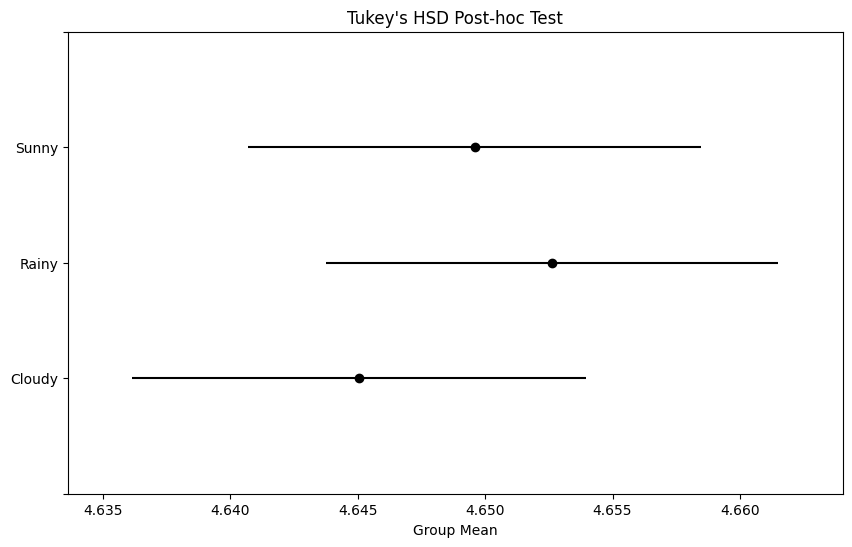

In [60]:
tukey_result = pairwise_tukeyhsd(endog=df['Yield_tons_per_hectare'],
                          groups=df['Weather_Condition'],
                          alpha=alpha)
print(tukey_result)
print('\n')
tukey_result.plot_simultaneous()

plt.title("Tukey's HSD Post-hoc Test")
plt.xlabel("Group Mean")
plt.show()

Above Figure Shows Mean Group Difference with All Groups

**meandiff:** Shows Difference Between Mean Of Two Groups.

**reject:** Shows If The Null Hypothesis is Rejected with respect To That group True Means Rejecting Null Hypothesis, False Means fail to Reject Null Hypothesis

**lower** and **upper:** \
Shows Confidence Interval For The Mean Difference, Present of **0** means There is No Statistically Significant Difference among Two Groups

In [62]:
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,North,Chalky,Maize,676.978212,16.811722,False,False,Rainy,117,4.505291
1,South,Loam,Cotton,965.178833,37.331926,False,True,Rainy,134,7.155132
2,North,Peaty,Barley,619.418797,18.318038,False,True,Cloudy,97,5.298954
3,South,Loam,Maize,160.106184,38.142053,False,False,Sunny,141,1.652356
4,East,Clay,Cotton,940.097532,21.723535,False,False,Rainy,117,5.824154
